In [ ]:
cd /content/drive/MyDrive/FallDetect

/content/drive/MyDrive/FallDetect


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
import os
import random

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/FallDetect/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/FallDetect/Test.csv")

In [ ]:
train.head()

,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,661,26.039919,7.309797,20.378162,2.782476,SDL,11.131080,3.891361,1.592927,7.086618,10.790400,1
1,122,25.864500,6.511954,14.187190,5.324864,FOL,7.945561,3.022175,2.376939,6.325522,7.719352,1
2,113,27.524501,12.944099,31.855926,22.891186,FOL,14.454818,4.849024,4.283890,12.888111,14.368784,1
3,14,30.647705,11.694868,23.608764,9.287735,FOL,15.228303,3.921537,2.794609,11.549971,14.944151,1
4,529,26.373917,11.168424,14.318453,15.983202,FKL,10.007396,3.087975,3.363557,11.057636,9.753058,1


In [ ]:
train.drop(['Unnamed: 0'], axis = 1, inplace = True)
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
train.shape

(1428, 11)

In [ ]:
test.shape

(356, 11)

In [ ]:
train.head()

,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,26.039919,7.309797,20.378162,2.782476,SDL,11.131080,3.891361,1.592927,7.086618,10.790400,1
1,25.864500,6.511954,14.187190,5.324864,FOL,7.945561,3.022175,2.376939,6.325522,7.719352,1
2,27.524501,12.944099,31.855926,22.891186,FOL,14.454818,4.849024,4.283890,12.888111,14.368784,1
3,30.647705,11.694868,23.608764,9.287735,FOL,15.228303,3.921537,2.794609,11.549971,14.944151,1
4,26.373917,11.168424,14.318453,15.983202,FKL,10.007396,3.087975,3.363557,11.057636,9.753058,1


In [ ]:
X_train = train.drop(['fall','label'],axis=1)
y_train = train['fall']
X_test =  test.drop(['fall','label'],axis=1)
y_test =  test['fall']

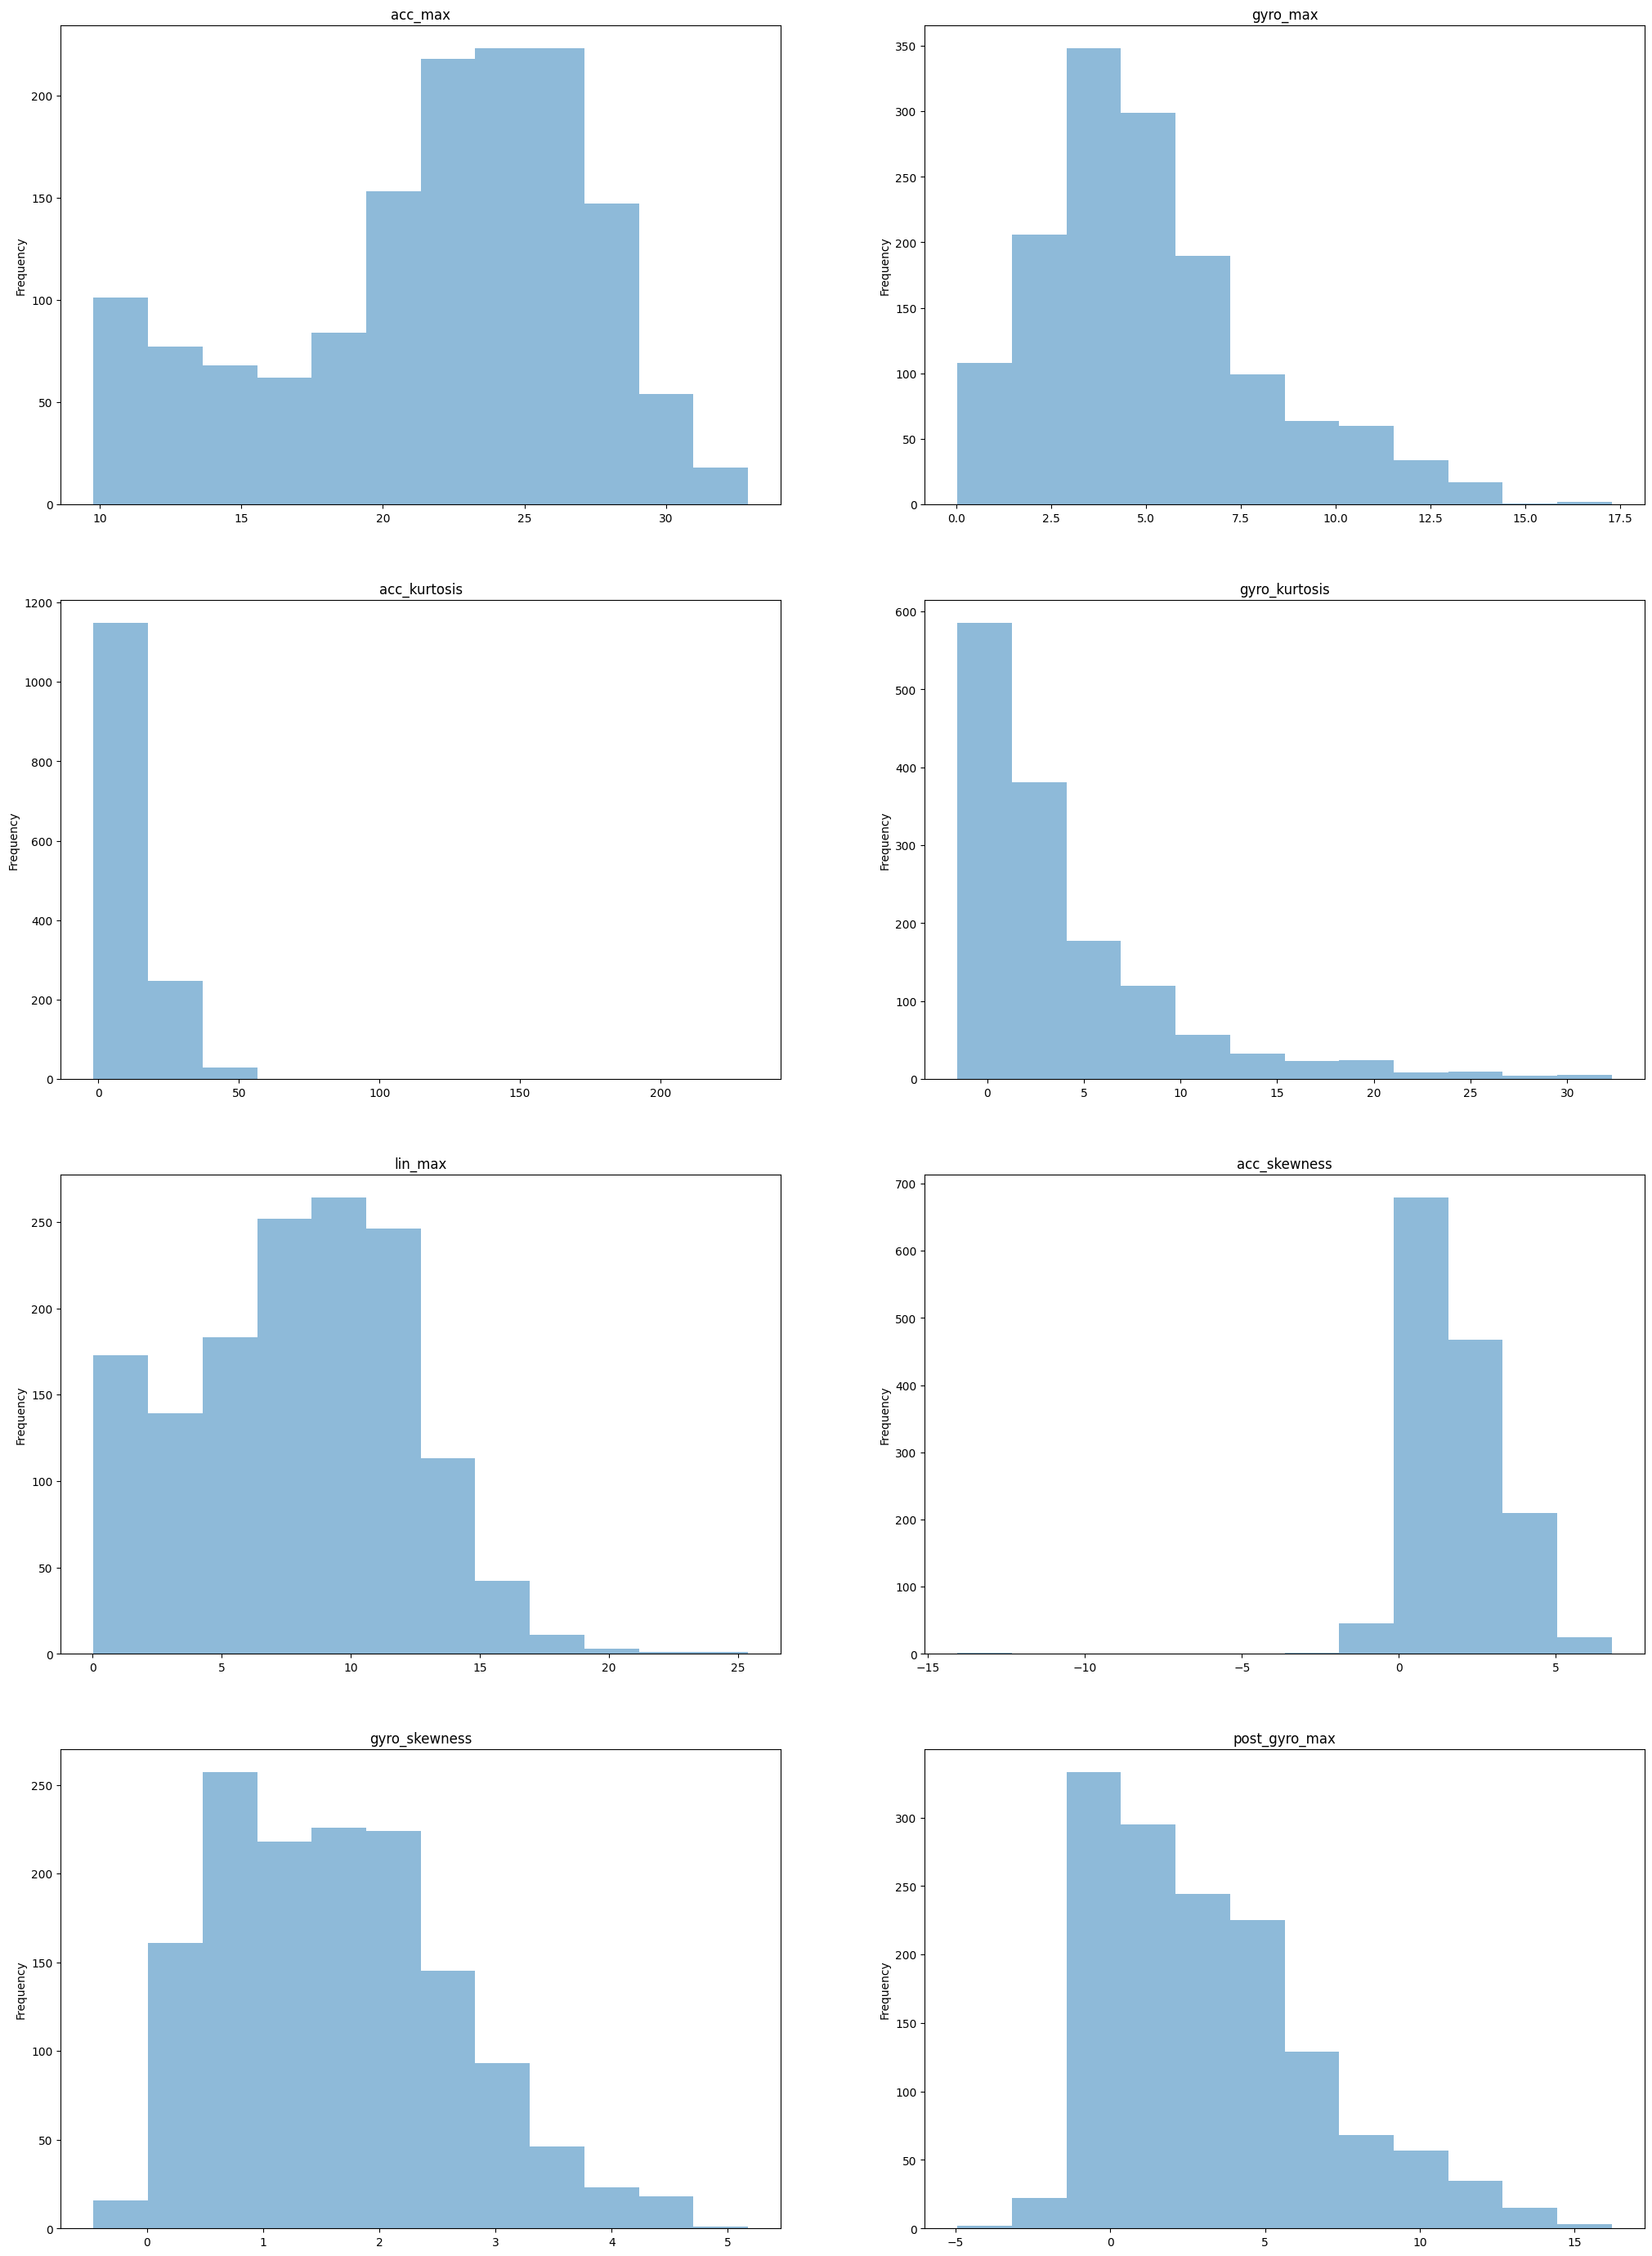

In [ ]:
import matplotlib.pyplot as plt

n_samples = X_train.shape[0]
n_features = X_train.shape[1]
figure, ax = plt.subplots(4, 2, figsize=(25, 35))
i = 0
j = 0

for col in X_train.columns:
    if j == 4:
        break  # Exit the loop if we have filled all subplots

    ax[j][i].title.set_text(col)
    X_train[col].plot.hist(bins=12, alpha=0.5, ax=ax[j][i])
    i += 1

    if i == 2:
        i = 0
        j += 1

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Number of trees in random forest
n_estimators = [200,400,600,800,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_depth = [None,10,30,50,70]
min_samples_split = [2, 5, 9, 12]
min_samples_leaf = [1, 3, 5, 7]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 10, 30, 50, 70], 'min_samples_split': [2, 5, 9, 12], 'min_samples_leaf': [1, 3, 5, 7], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 25, cv = 10,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1
                              )
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 30, 50, 70],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 5, 9, 12],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = (((predictions==test_labels).sum())/test_labels.shape[0])*100
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [ ]:
best_estimator = rf_random.best_estimator_
optimal_accuracy = evaluate(best_estimator, X_test, y_test)

Model Performance
Accuracy = 97.19%.


In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the best estimator (trained Random Forest model) to a file
model_filename = "rfmodel.pkl"
joblib.dump(best_estimator, model_filename)

print(f"Model saved as '{model_filename}'")


Model saved as 'rfmodel.pkl'


In [ ]:
loaded_model = joblib.load(model_filename)

In [ ]:
input_data = np.array([28.0551986,	10.79461732,	21.33453645,	34.16381128,13.88057794,	3.283404438,	4.577282543,	10.75533864,	13.7625612])
input_data = input_data.reshape(1, -1)  # Reshape the data to match the model's input shape

# Make the prediction
prediction = loaded_model.predict(input_data)

# The 'prediction' variable now contains the predicted class or label (e.g., 'fall' or 'non-fall')
print("Predicted class:", prediction[0])

Predicted class: 1
